In [1]:
import numpy as np
import matplotlib.pyplot as plt

from experiment_params import ExperimentsParameters

In [2]:
def var_beta_distribution(a, b):
    return a*b/((a+b)**2*(a+b+1))
var_beta_distribution(5, 5), var_beta_distribution(2, 6)

(0.022727272727272728, 0.020833333333333332)

### Just MP and final proposal

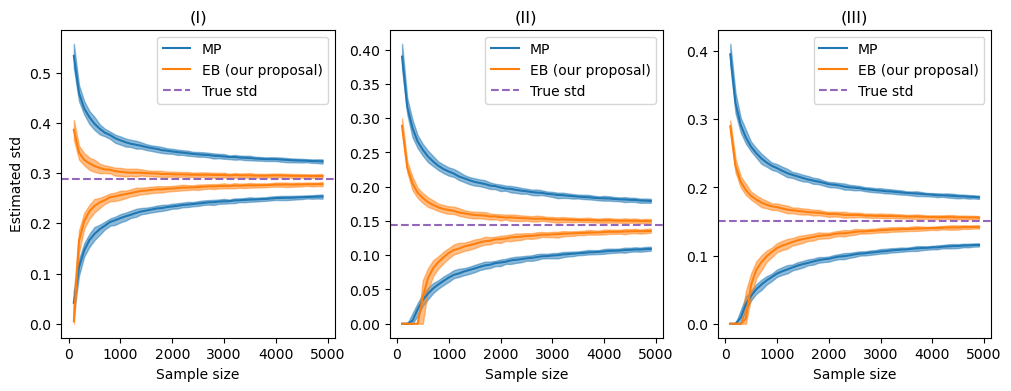

In [3]:
plt.rcParams["figure.figsize"] = (12,4)

params = ExperimentsParameters()
quantile = 0.975

experiment_type_list = [ "uniform", "beta", "beta1"]

var_list = [1/12, var_beta_distribution(2, 6), var_beta_distribution(5, 5)]
title_list = ["(I)", "(II)", "(III)"]
sample_size_list = params.sample_size_list

start_idx = 0
for k, experiment_type in enumerate(experiment_type_list):
    
    m = np.load("./data/" + experiment_type + ".npy")

    mpUB = m[:, :, 0]
    mpcenter = m[:, :, 1]
    mpLB = m[:, :, 2]
    ebUB = m[:, :, 3]
    ebUBcenter = m[:, :, 4]
    ebLB = m[:, :, 5]
    ebLBcenter = m[:, :, 6]
    ebLBupsilon = m[:, :, 7]
    ebLBupsiloncenter = m[:, :, 8]
    decoupledUB = m[:, :, 9]
    decoupledcenter = m[:, :, 10]
    decoupledLB = m[:, :, 11]
    

    plt.subplot(1, len(experiment_type_list), k+1)
    plt.plot(sample_size_list[start_idx:], np.mean(mpUB, axis=0)[start_idx:], color="C0", label="MP")
    plt.plot(sample_size_list[start_idx:], np.mean(ebUB, axis=0)[start_idx:], color="C1", label="EB (our proposal)")

    plt.plot(sample_size_list[start_idx:], np.mean(mpLB, axis=0)[start_idx:], color="C0")
    plt.plot(sample_size_list[start_idx:], np.mean(ebLB, axis=0)[start_idx:], color="C1") #, label="Bennett"

    plt.fill_between(sample_size_list[start_idx:], np.quantile(mpUB, q = quantile, axis = 0), np.quantile(mpUB, q=1-quantile, axis = 0), alpha=0.5, color="C0")
    plt.fill_between(sample_size_list[start_idx:], np.quantile(ebUB, q = quantile, axis = 0), np.quantile(ebUB, q=1-quantile, axis = 0), alpha=0.5, color="C1")

    plt.fill_between(sample_size_list[start_idx:], np.quantile(mpLB, q = quantile, axis = 0), np.quantile(mpLB, q=1-quantile, axis = 0), alpha=0.5, color="C0")
    plt.fill_between(sample_size_list[start_idx:], np.quantile(ebLB, q = quantile, axis = 0), np.quantile(ebLB, q=1-quantile, axis = 0), alpha=0.5, color="C1")

    plt.axhline(y=np.sqrt(var_list[k]), color='C4', linestyle='--', label='True std')
    plt.title(f"{title_list[k]}")
    plt.xlabel("Sample size")
    if k == 0:
        plt.ylabel("Estimated std")
    plt.legend()
plt.savefig("./plots/eb_vs_mp", bbox_inches='tight', dpi=400) 

### EB vs EBupsilon

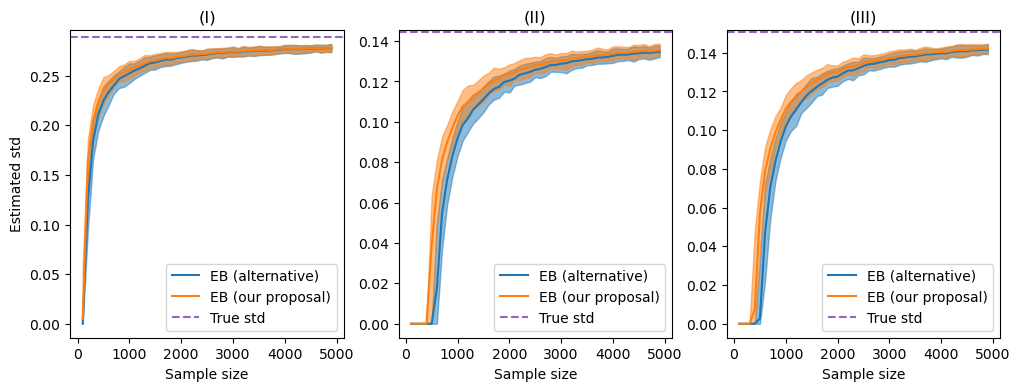

In [4]:
plt.rcParams["figure.figsize"] = (12,4)

params = ExperimentsParameters()

experiment_type_list = [ "uniform", "beta", "beta1"]

var_list = [1/12, var_beta_distribution(2, 6), var_beta_distribution(5, 5)]
title_list = ["(I)", "(II)", "(III)"]
sample_size_list = params.sample_size_list

start_idx = 0
for k, experiment_type in enumerate(experiment_type_list):
    
    m = np.load("./data/" + experiment_type + ".npy")

    mpUB = m[:, :, 0]
    mpcenter = m[:, :, 1]
    mpLB = m[:, :, 2]
    ebUB = m[:, :, 3]
    ebUBcenter = m[:, :, 4]
    ebLB = m[:, :, 5]
    ebLBcenter = m[:, :, 6]
    ebLBupsilon = m[:, :, 7]
    ebLBupsiloncenter = m[:, :, 8]
    decoupledUB = m[:, :, 9]
    decoupledcenter = m[:, :, 10]
    decoupledLB = m[:, :, 11]
    

    plt.subplot(1, len(experiment_type_list), k+1)
    plt.plot(sample_size_list[start_idx:], np.mean(ebLBupsilon, axis=0)[start_idx:], color="C0", label="EB (alternative)")
    plt.plot(sample_size_list[start_idx:], np.mean(ebLB, axis=0)[start_idx:], color="C1", label="EB (our proposal)")

    plt.fill_between(sample_size_list[start_idx:], np.quantile(ebLBupsilon, q = quantile, axis = 0), np.quantile(ebLBupsilon, q=1-quantile, axis = 0), alpha=0.5, color="C0")
    plt.fill_between(sample_size_list[start_idx:], np.quantile(ebLB, q = quantile, axis = 0), np.quantile(ebLB, q=1-quantile, axis = 0), alpha=0.5, color="C1")
    


    plt.axhline(y=np.sqrt(var_list[k]), color='C4', linestyle='--', label='True std')
    plt.title(f"{title_list[k]}")
    plt.xlabel("Sample size")
    if k == 0:
        plt.ylabel("Estimated std")
    plt.legend()

plt.savefig("./plots/eb_vs_ebalternative", bbox_inches='tight', dpi=400) 

### EB vs decoupled

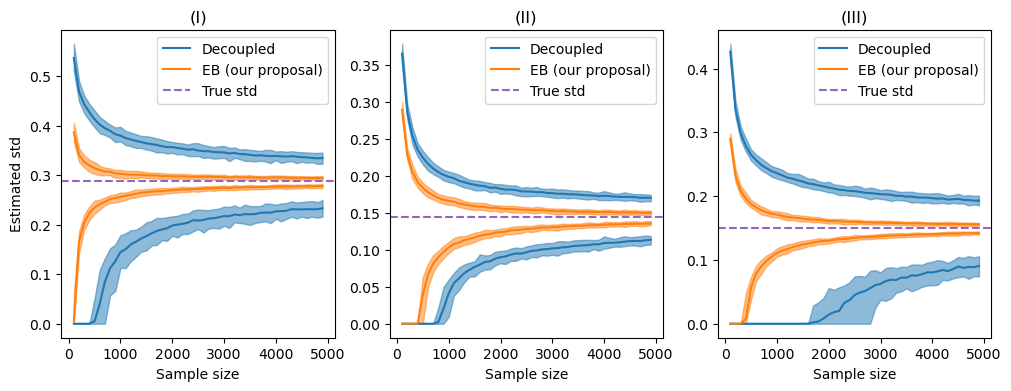

In [5]:
plt.rcParams["figure.figsize"] = (12,4)

params = ExperimentsParameters()

experiment_type_list = [ "uniform", "beta", "beta1"]

var_list = [1/12, var_beta_distribution(2, 6), var_beta_distribution(5, 5)]

title_list = ["(I)", "(II)", "(III)"]
sample_size_list = params.sample_size_list

start_idx = 0
for k, experiment_type in enumerate(experiment_type_list):
    
    m = np.load("./data/" + experiment_type + ".npy")

    mpUB = m[:, :, 0]
    mpcenter = m[:, :, 1]
    mpLB = m[:, :, 2]
    ebUB = m[:, :, 3]
    ebUBcenter = m[:, :, 4]
    ebLB = m[:, :, 5]
    ebLBcenter = m[:, :, 6]
    ebLBupsilon = m[:, :, 7]
    ebLBupsiloncenter = m[:, :, 8]
    decoupledUB = m[:, :, 9]
    decoupledcenter = m[:, :, 10]
    decoupledLB = m[:, :, 11]

    decoupledLB = np.nan_to_num(decoupledLB, nan=0.0)
    

    plt.subplot(1, len(experiment_type_list), k+1)
    plt.plot(sample_size_list[start_idx:], np.mean(decoupledUB, axis=0)[start_idx:], color="C0", label="Decoupled")
    plt.plot(sample_size_list[start_idx:], np.mean(ebUB, axis=0)[start_idx:], color="C1", label="EB (our proposal)")
    

    plt.plot(sample_size_list[start_idx:], np.mean(decoupledLB, axis=0)[start_idx:], color="C0")
    plt.plot(sample_size_list[start_idx:], np.mean(ebLB, axis=0)[start_idx:], color="C1") #, label="Bennett"

    plt.fill_between(sample_size_list[start_idx:], np.quantile(decoupledUB, q = quantile, axis = 0), np.quantile(decoupledUB, q=1-quantile, axis = 0), alpha=0.5, color="C0")
    plt.fill_between(sample_size_list[start_idx:], np.quantile(ebUB, q = quantile, axis = 0), np.quantile(ebUB, q=1-quantile, axis = 0), alpha=0.5, color="C1")

    plt.fill_between(sample_size_list[start_idx:], np.quantile(decoupledLB, q = quantile, axis = 0), np.quantile(decoupledLB, q=1-quantile, axis = 0), alpha=0.5, color="C0")
    plt.fill_between(sample_size_list[start_idx:], np.quantile(ebLB, q = quantile, axis = 0), np.quantile(ebLB, q=1-quantile, axis = 0), alpha=0.5, color="C1")

    plt.axhline(y=np.sqrt(var_list[k]), color='C4', linestyle='--', label='True std')
    plt.title(f"{title_list[k]}")
    plt.xlabel("Sample size")
    if k == 0:
        plt.ylabel("Estimated std")
    plt.legend()
plt.savefig("./plots/eb_vs_decoupled", bbox_inches='tight', dpi=400) 